In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys
!pip install httpstan
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet

trix<stan::math::var,-1,1,0,-1,1>>::prepare_x_vis(void)': cannot convert argument 1 from 'const Eigen::Matrix<stan::math::var,-1,1,0,-1,1>' to 'const std::vector<stan::math::var,std::allocator<stan::math::var>> &'
          with
          [
              F=stan::math::internal::ordered_constrain_op
          ]
  httpstan/lib/stan/lib/stan_math\stan/math/rev/mat/functor/adj_jac_apply.hpp(412): note: Reason: cannot convert from 'const Eigen::Matrix<stan::math::var,-1,1,0,-1,1>' to 'const std::vector<stan::math::var,std::allocator<stan::math::var>>'
  httpstan/lib/stan/lib/stan_math\stan/math/rev/mat/functor/adj_jac_apply.hpp(412): note: No user-defined-conversion operator available that can perform this conversion, or the operator cannot be called
  httpstan/lib/stan/lib/stan_math\stan/math/rev/mat/functor/adj_jac_apply.hpp(281): note: see declaration of 'stan::math::adj_jac_vari<F,Eigen::Matrix<stan::math::var,-1,1,0,-1,1>>::prepare_x_vis'
          with
          [
              F=stan

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
fdir = os.path.join(sys.path[0],"data/")
flist = os.listdir(fdir)
DataSet = {}
for file in flist:
    # print(file)
    Coinname = file.replace("coin_", "", 1).replace(".csv","",1)
    # print(Coinname)
    DataSet[Coinname] = pd.read_csv("data/"+file)

In [3]:
# Show all the available cryptocurrencies
for key in DataSet:
    print(key)

Aave
BinanceCoin
Bitcoin
Cardano
ChainLink
Cosmos
CryptocomCoin
Dogecoin
EOS
Ethereum
Iota
Litecoin
Monero
NEM
Polkadot
Solana
Stellar
Tether
Tron
Uniswap
USDCoin
WrappedBitcoin
XRP


In [4]:
coin = "Bitcoin"
df = DataSet[coin]

In [5]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
cols = [3,7]
df = df[df.columns[cols]]
df.columns = ['Date','Close']
df.rename(columns={"Date": "ds", "Close": "y"},inplace=True)
df.head()

C:\Users\cools\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


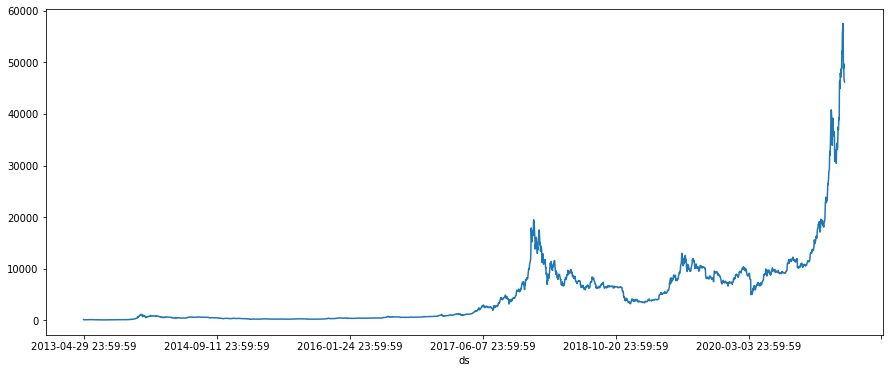

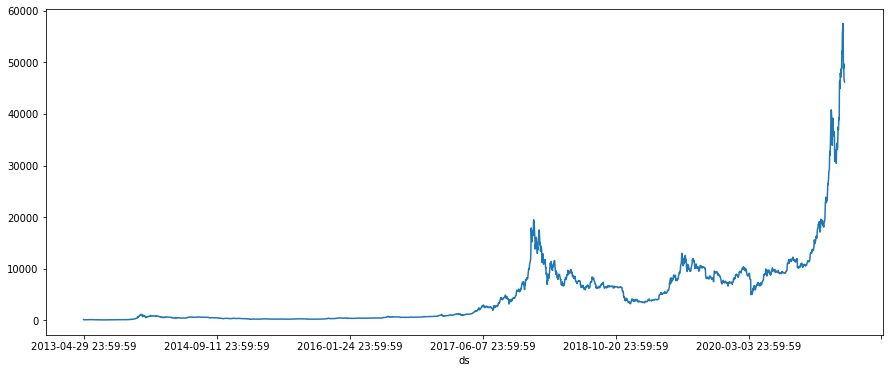

In [7]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(15,6))
df.set_index('ds').y.plot().figure

In [67]:
m = Prophet(daily_seasonality=True,seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m.fit(df)

In [68]:
future = m.make_future_dataframe(periods=12, freq ='MS')
future.tail()

,ds
2869,2021-10-01 23:59:59
2870,2021-11-01 23:59:59
2871,2021-12-01 23:59:59
2872,2022-01-01 23:59:59
2873,2022-02-01 23:59:59


In [69]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29 23:59:59,76.545151,-2834.758612,2822.158258
1,2013-04-30 23:59:59,78.388354,-2669.370737,2760.262634
2,2013-05-01 23:59:59,81.829147,-2699.625788,2901.410307
3,2013-05-02 23:59:59,84.404776,-2845.404517,3023.012767
4,2013-05-03 23:59:59,87.629558,-2673.393859,2910.196991


<AxesSubplot:xlabel='ds'>

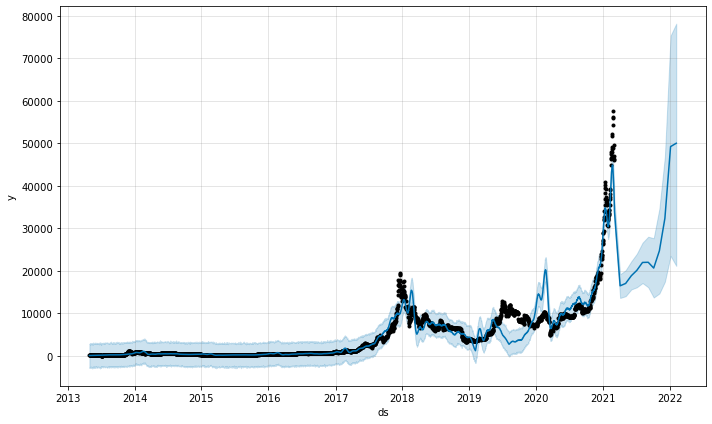

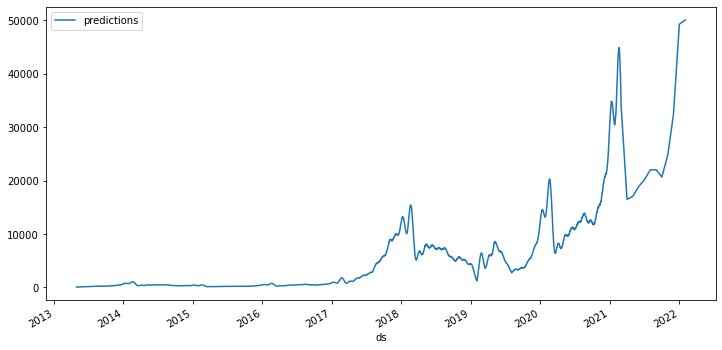

In [70]:
fig1 = m.plot(forecast)
forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,6))

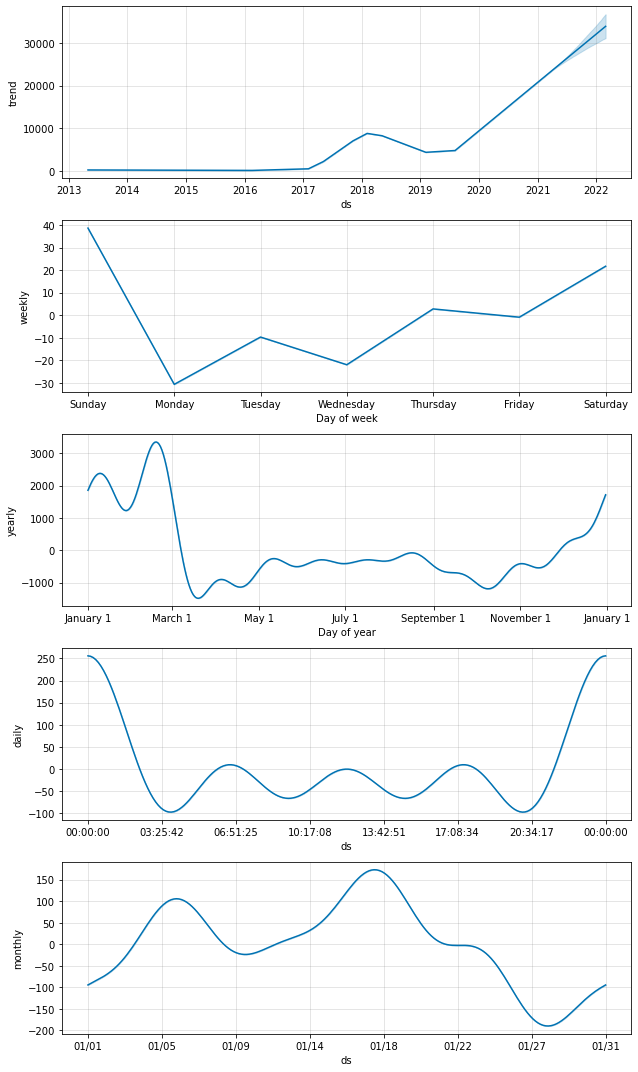

In [60]:
fig2 = m.plot_components(forecast)